In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import files
import zipfile
import os

In [ ]:
uploaded = files.upload()

Saving DLimages.zip to DLimages.zip


In [ ]:
zip_file_path = "DLimages.zip"
extracted_folder_path = "/content/datasetorg1"


In [ ]:
with zipfile.ZipFile('DLimages.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/datasetorg1')

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    extracted_folder_path,
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=123
)
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    extracted_folder_path,
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=123
)


Found 335 files belonging to 3 classes.
Using 268 files for training.
Found 335 files belonging to 3 classes.
Using 67 files for validation.


In [ ]:
def create_model():
  model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
      layers.MaxPooling2D(),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(128, (3, 3), activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(len(train_data.class_names), activation='softmax')
])
  return model

model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(train_data, validation_data=validation_data, epochs=5)

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.3615 - loss: 545.3796 - val_accuracy: 0.5373 - val_loss: 3.1540
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.5776 - loss: 1.2940 - val_accuracy: 0.4030 - val_loss: 1.2153
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7881 - loss: 0.6500 - val_accuracy: 0.5522 - val_loss: 0.8658
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8117 - loss: 0.5231 - val_accuracy: 0.6269 - val_loss: 0.9393
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9031 - loss: 0.3155 - val_accuracy: 0.6269 - val_loss: 1.2126


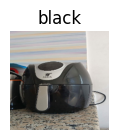

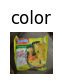

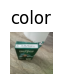

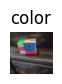

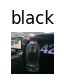

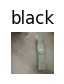

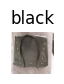

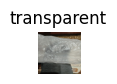

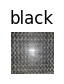

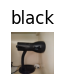

In [ ]:
import matplotlib.pyplot as plt
def display_validation_images(validation_dataset, num_images=10):
    plt.figure(figsize=(15, 5))
    for images, labels in validation_dataset.take(1):
      for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(validation_dataset.class_names[labels[i]])
        plt.axis("off")
        plt.show()

display_validation_images(validation_data)

In [ ]:
conveyor_belt_map = {
'black': 'A',
'color': 'B',
'transparent': 'C'
}


In [ ]:
def predict_conveyor_belt(img_array):
  predictions = model.predict(img_array)
  predicted_class = np.argmax(predictions[0])
  predicted_label = train_data.class_names[predicted_class]
  conveyor_belt = conveyor_belt_map.get(predicted_label, "Unknown")
  return predicted_label, conveyor_belt

Saving WhatsApp Image 2024-10-28 at 13.05.33.jpeg to WhatsApp Image 2024-10-28 at 13.05.33.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


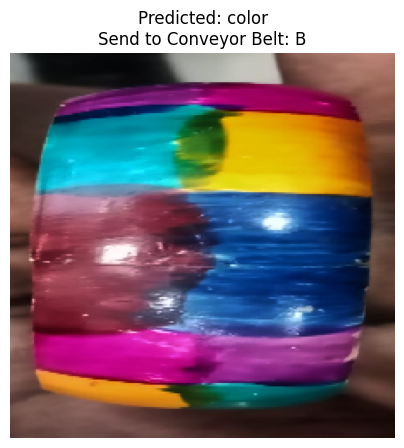

In [ ]:
def upload_and_predict_image():
  uploaded = files.upload()
  for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    predicted_label, conveyor_belt = predict_conveyor_belt(img_array)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nSend to Conveyor Belt: {conveyor_belt}")
    plt.axis("off")
    plt.show()

upload_and_predict_image()


In [ ]:
loss, accuracy = model.evaluate(validation_data)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 0.5791 - loss: 1.4212
Validation Loss: 1.2126, Validation Accuracy: 0.6269


In [ ]:
model.save('imgcolor_classification_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('imgcolor_classification_model.h5')
